Import Required Libraries

In [ ]:
# Core numerical and data handling libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

Generate Synthetic Dataset (Reproducible)

In [ ]:
# Initialize a reproducible random number generator
rng = np.random.default_rng(seed=42)

# Generate random data
study_hours = rng.integers(1, 10, size=50)        # Study hours: 1–9
attendance = rng.integers(50, 101, size=50)      # Attendance: 50–100%

# Define target variable using a simple rule
# If weighted score > 120 → Pass (1), else Fail (0)
passed = ((study_hours * 10 + attendance) > 120).astype(int)

# Create DataFrame
df = pd.DataFrame({
    "StudyHours": study_hours,
    "Attendance": attendance,
    "Pass": passed
})

df

,StudyHours,Attendance,Pass
0,1,88,0
1,7,59,1
2,6,68,1
3,4,73,0
4,4,75,0
5,8,52,1
6,1,77,0
7,7,57,1
8,2,87,0
9,1,84,0


Data Visualization (Exploratory Analysis)

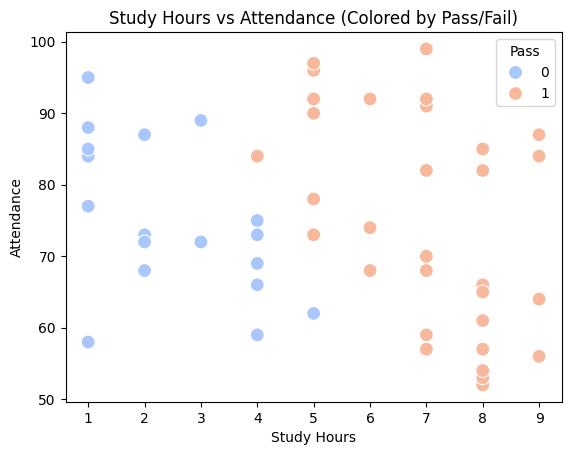

In [ ]:
# Visualize the relationship between features and target variable
sns.scatterplot(
    x="StudyHours", y="Attendance",hue="Pass",data=df,palette="coolwarm", s=100
)

plt.title("Study Hours vs Attendance (Colored by Pass/Fail)")
plt.xlabel("Study Hours")
plt.ylabel("Attendance")
plt.legend(title="Pass")
plt.show()


Prepare Data for Logistic Regression

Train Logistic Regression Model

Logistic regression uses the sigmoid function to predict probabilities(0 to 1)

In [ ]:
# Separate features (X) and target variable (y)
from sklearn.model_selection import train_test_split
x = df[['StudyHours', 'Attendance']]
y = df['Pass']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(x_train, y_train)


LogisticRegression()

Model Parameters

In [ ]:
# Display model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[2.07710681 0.16046913]]
Intercept: [-21.3325469]


Make Predictions

.predict() gives binary output(0 or 1)

.predict_proba() gives the probability of each class

In [ ]:
y_test

,Pass
22,0
45,1
41,1
33,1
24,1
36,1
10,1
42,1
26,0
9,0


In [ ]:
y_pred = log_reg.predict(x_test)
y_prob = log_reg.predict_proba(x_test)[:,1]

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted':y_pred, 'Probability_of_Pass':y_prob})

,Actual,Predicted,Probability_of_Pass
22,0,0,0.005362
45,1,1,0.999397
41,1,1,0.999415
33,1,1,0.973377
24,1,1,0.999806
36,1,1,0.980658
10,1,1,0.987185
42,1,1,0.999496
26,0,0,0.093404
9,0,0,0.003757


In [ ]:
# Predict pass/fail for a new student
# Example: StudyHours = 6, Attendance = 85
prediction = model.predict([[6, 85]])
probability = model.predict_proba([[6, 85]])

print("Prediction (0 = Fail, 1 = Pass):", prediction[0])
print("Prediction Probability:", probability)


Prediction (0 = Fail, 1 = Pass): 1
Prediction Probability: [[0.00840932 0.99159068]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on training data
y_pred = model.predict(X)

# Accuracy
print("Accuracy:", accuracy_score(y, y_pred))

# Detailed classification report
print(classification_report(y, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        32

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
# New student data
new_student = np.array([[9, 25]])   #Must be 2D: [[study_Hours, Attendence]]

In [ ]:
# predict pass/fail
pred_class = log_reg.predict(new_student)
print(f"Predicted Class (0=Fail, 1=Pass): {pred_class[0]}")

Predicted Class (0=Fail, 1=Pass): 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# predict probability of passing
pred_prob = log_reg.predict_proba(new_student)[0][1]
print(f"Probability of Passing: {pred_prob:2f}")


Probability of Passing: 0.832108


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Conclusion
This project demonstrates:
- Synthetic dataset creation
- Exploratory data visualization
- Binary classification using Logistic Regression
- Model interpretation and prediction

The model successfully learns the relationship between
study hours, attendance, and exam outcome.

This project can be extended using:
- Train-test split
- Real-world datasets
- Decision boundary visualization
